#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Exploratory Data Analysis

In [3]:
# reading dataset
df = pd.read_csv('datasets/hr_employee_churn_data.csv')

In [4]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
# dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [6]:
df.shape

(14999, 10)

In [7]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Categorical Features**
- work_accident
- promotion_last_5years
- salary

In [8]:
df['Work_accident'].uniqueque()

array([0, 1], dtype=int64)

In [9]:
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [10]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

Checking employee range based on column "left"

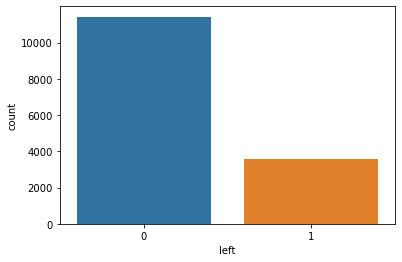

In [12]:
sns.countplot(x='left', data=df);
plt.show();

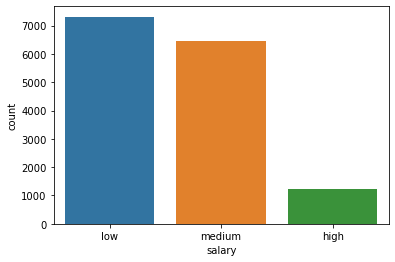

In [13]:
sns.countplot(x='salary', data=df);
plt.show();

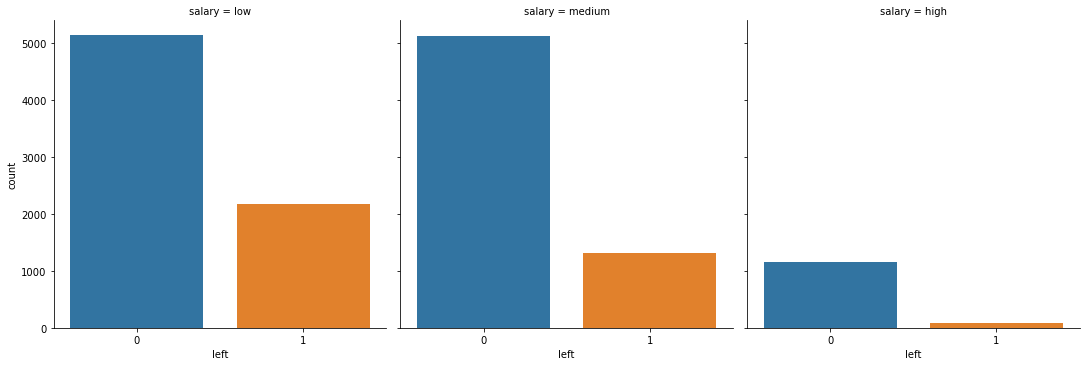

In [15]:
# "left" split over the feature "salary"
sns.catplot(x='left', col='salary', data=df, kind='count');

**From above graph we can see that low salary ratio employee who have low salary has high chance to leave the comapany**

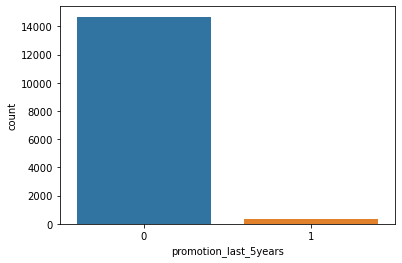

In [16]:
sns.countplot(x='promotion_last_5years', data=df);
plt.show();

# not promoted employee count is high

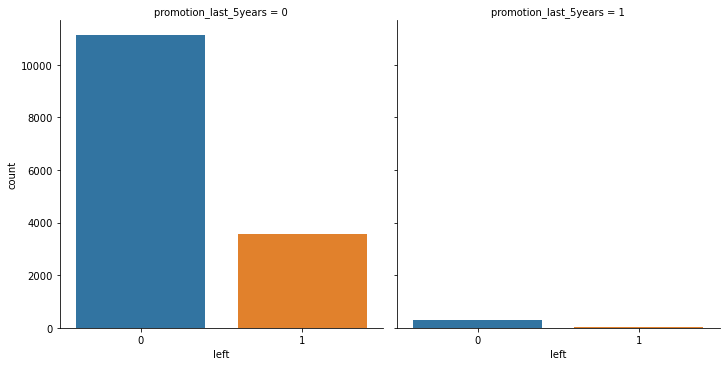

In [17]:
# spliting "left" column with "promotion_last_5years"
sns.catplot(x='left', col='promotion_last_5years', data=df, kind='count');

**Non-Promoted employee having high leaving rate**

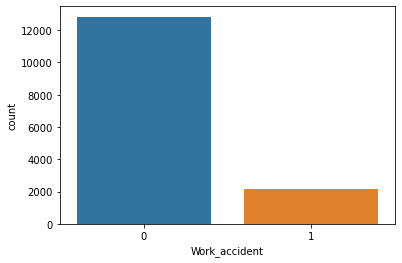

In [19]:
sns.countplot(x='Work_accident', data=df);
plt.show();

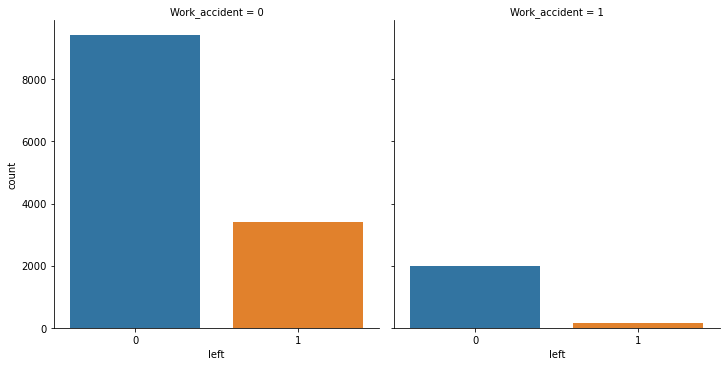

In [20]:
# spliting "left" column with "Work_accident"
sns.catplot(x='left', col='Work_accident', data=df, kind='count');

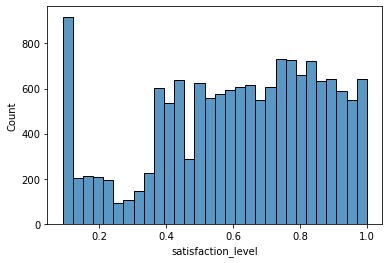

In [32]:
# Numerical Feature
sns.histplot(df['satisfaction_level']);

**Graph has high value at 0.1 and it distribute over 0.1 to 1.0**

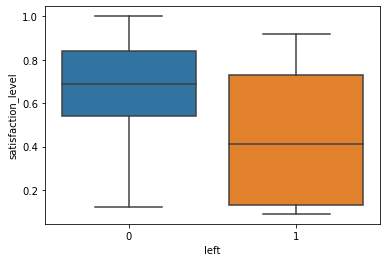

In [22]:
sns.boxplot(x='left', y='satisfaction_level', data=df);

**Employees having less satisfaction level 0.2 to around 0.5 has high leaving rate**

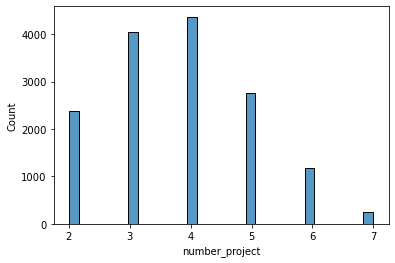

In [31]:
sns.histplot(df['number_project']);

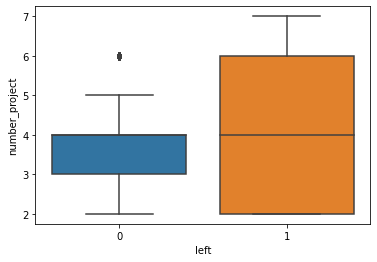

In [24]:
sns.boxplot(x='left', y='number_project', data=df);

**From above we can see that employees having project between 3 to 4 has less chances to leave, Employee will left if the project count high**

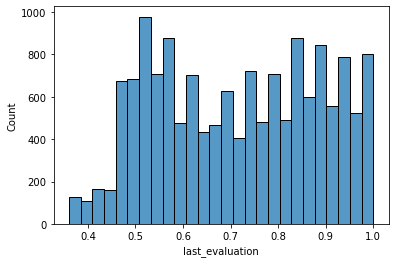

In [30]:
sns.histplot(df['last_evaluation']);

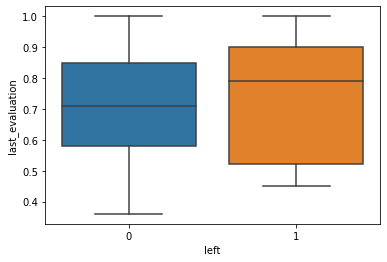

In [28]:
sns.boxplot(x='left', y='last_evaluation', data=df);

**This does not has much impact but employee who has high last_evaluation left the company**

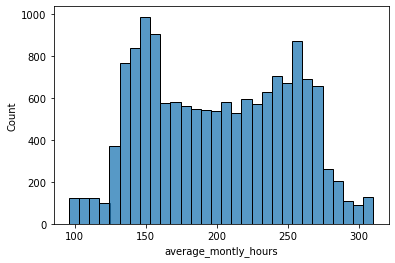

In [33]:
sns.histplot(df['average_montly_hours']);

**average_montly_hours distributed from 100 to 300 where it has high count at around 150**

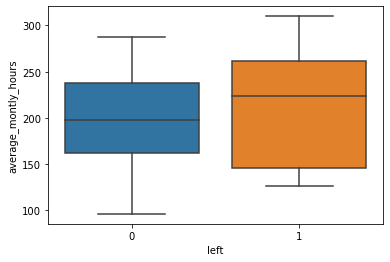

In [34]:
sns.boxplot(x='left', y='average_montly_hours', data=df);

**Employee left who has high average_montly_hours**

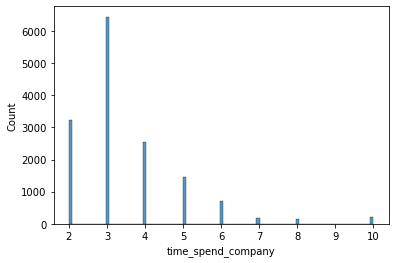

In [35]:
sns.histplot(df['time_spend_company']);

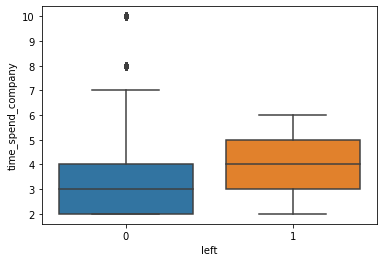

In [36]:
sns.boxplot(x='left', y='time_spend_company', data=df);

**Employee left who has high time_spend_company value**

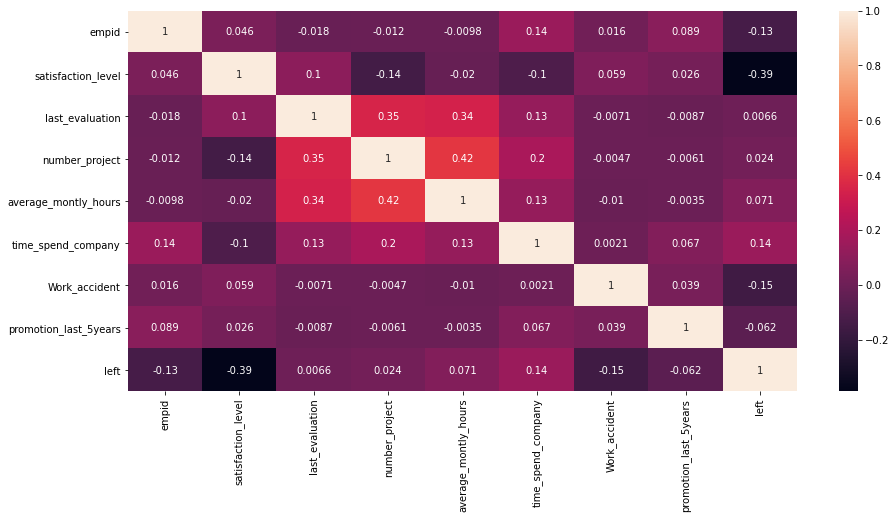

In [37]:
### Checkig correlation

cor_mat = df.corr();
fig = plt.figure(figsize = (15, 7));
sns.heatmap(cor_mat, annot=True);

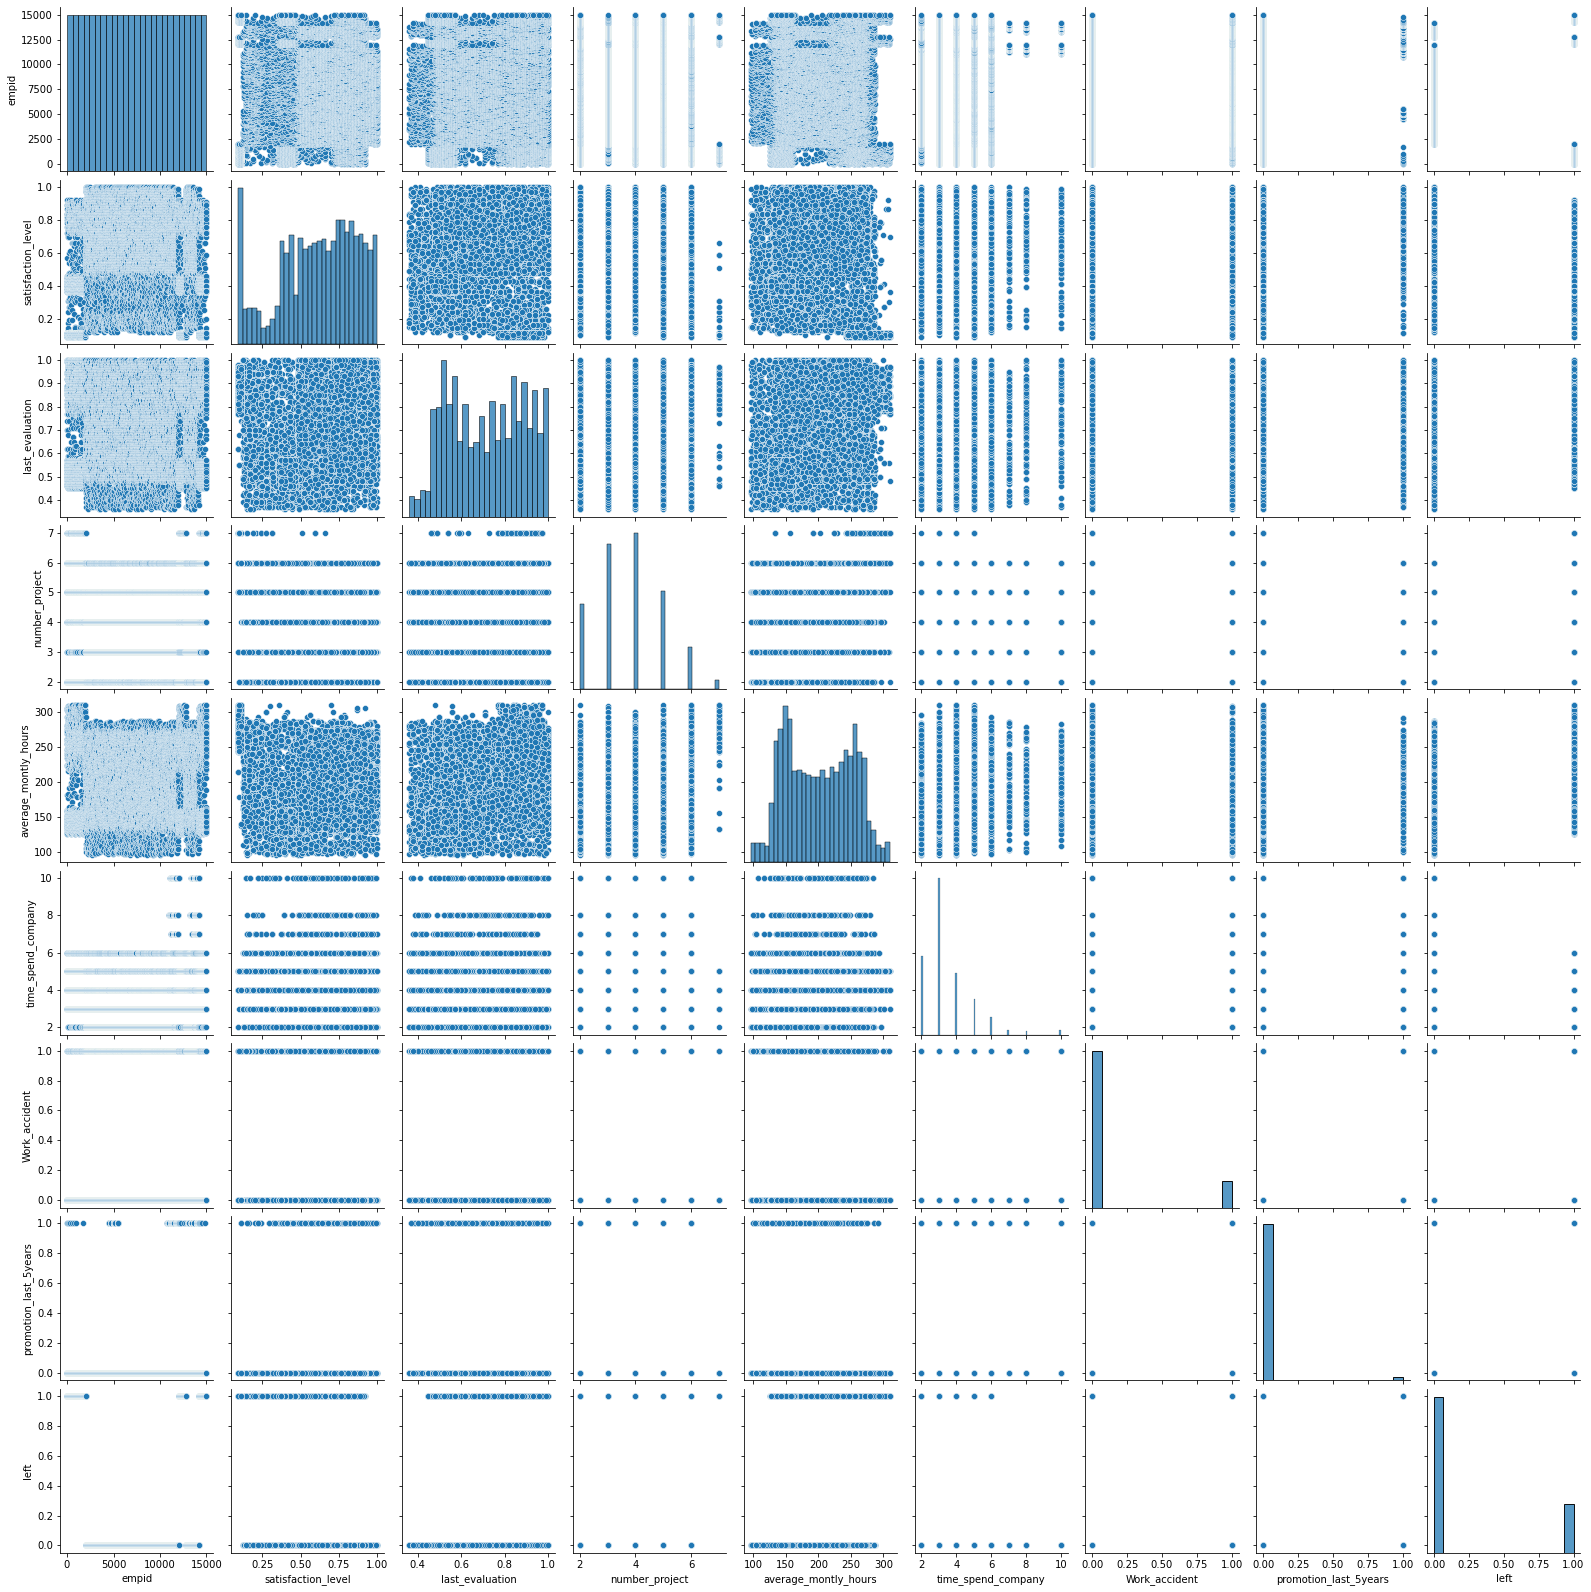

In [38]:
### Pair Plot
sns.pairplot(df);